In [9]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
import arviz as az

In [10]:
iris_df = pd.read_csv('i200441 Sheheryar Ramzan - iris.csv')


iris_df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [11]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
iris_df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [14]:
df=iris_df.copy()

In [15]:
df['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [16]:
data=df['sepal_length'].to_numpy()

### Use library i.e pymc3 or arviz and plot the above data on KDE plot 

<AxesSubplot: >

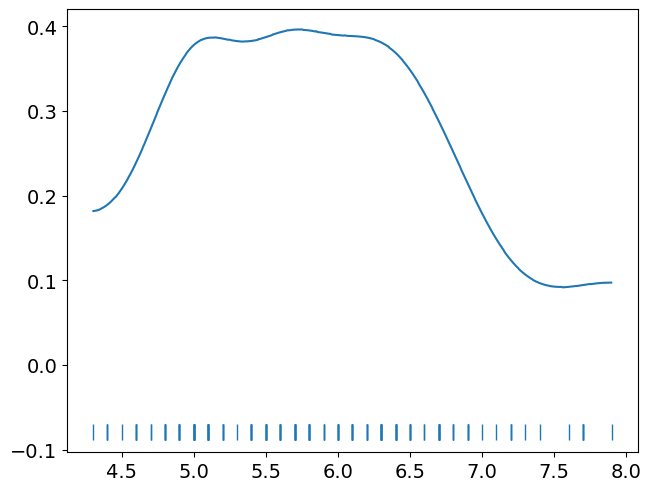

In [17]:
# write your code here for plotting data variable here, you can take help from book chapter 2 ipynb file on GCR
az.plot_kde(data, rug=True)

# creation of the Model here 

In [18]:
with pm.Model() as model_iris:
    mu = pm.Normal('mu', mu=0, sigma=1)
    sd = pm.HalfNormal('sd', sigma=1)
    y = pm.Normal('obs', mu=mu, sigma=sd, observed=data)
    trace_g = pm.sample(1000)
  # Choose priors and likelyhood
  # write your inference variable here
  # create your model



C:\Users\shehe\AppData\Local\Temp\ipykernel_1224\2361495575.py:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_g = pm.sample(1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, mu]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 54 seconds.


D:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot: title={'center': 'mu'}>,
        <AxesSubplot: title={'center': 'mu'}>],
       [<AxesSubplot: title={'center': 'sd'}>,
        <AxesSubplot: title={'center': 'sd'}>]], dtype=object)

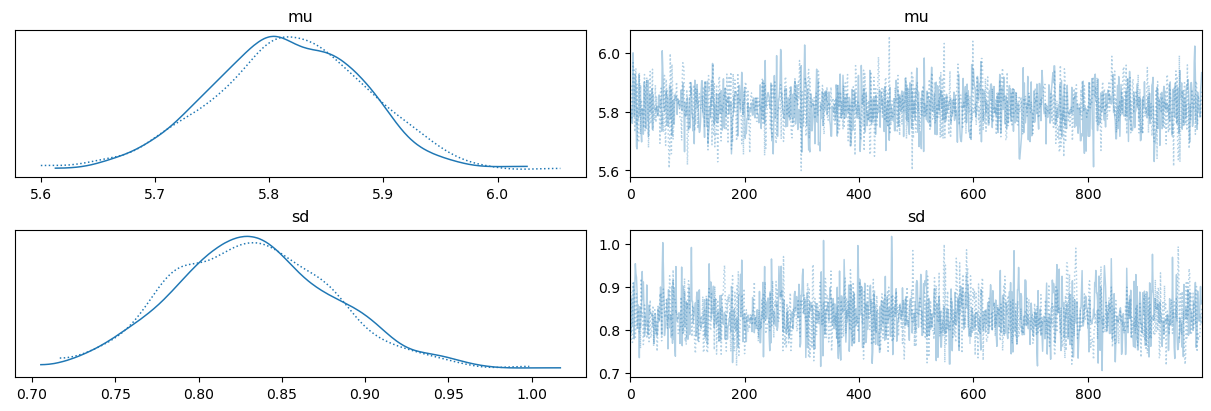

In [19]:
# plot your model inference variable here using library we disscussed in class
az.plot_trace(trace_g)

# write code here for pair plot and check the estemate for two priors

D:\Anaconda\lib\site-packages\arviz\plots\jointplot.py:144: UserWarning: plot_joint will be deprecated. Please use plot_pair instead.
  warnings.warn("plot_joint will be deprecated. Please use plot_pair instead.")
D:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot: xlabel='mu', ylabel='sd'>, <AxesSubplot: >,
       <AxesSubplot: >], dtype=object)

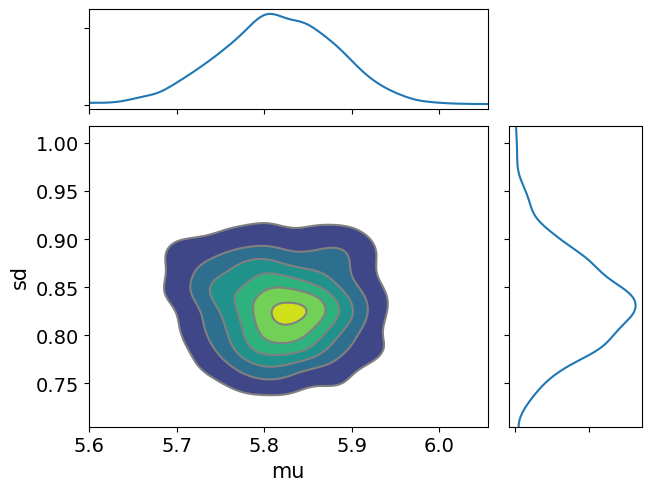

In [20]:
# write code here for pair plot and check the estemate for two priors
az.plot_joint(trace_g, kind='kde', fill_last=False)


# write code here to summarise the results

In [21]:
az.summary(trace_g)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,5.816,0.068,5.691,5.941,0.002,0.001,1702.0,1096.0,1.0
sd,0.833,0.049,0.731,0.916,0.001,0.001,1569.0,1375.0,1.0


D:\Anaconda\lib\site-packages\pymc3\sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


D:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
posterior predictive variable obs's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


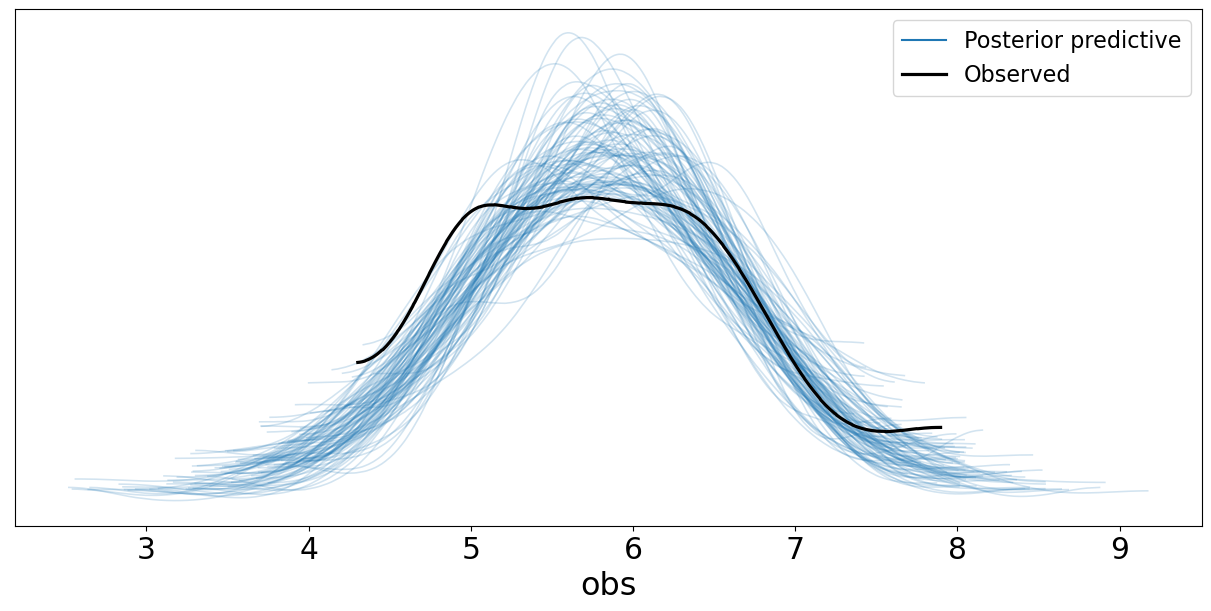

In [22]:
# write code for compairision of your results here 
y_pred_g = pm.sample_posterior_predictive(trace_g, 100, model_iris)
data_ppc = az.from_pymc3(trace=trace_g, posterior_predictive=y_pred_g)
ax = az.plot_ppc(data_ppc, figsize=(12, 6), mean=False)


# You can work on Student T model incase if results are not robust from above model?

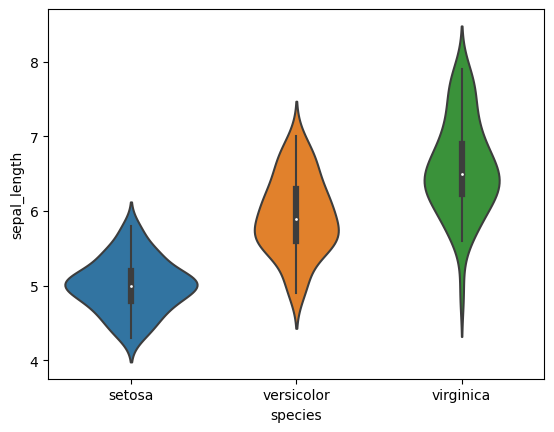

In [23]:
#Group Comparison 
tips = pd.read_csv('i200441 Sheheryar Ramzan - iris.csv')
tips.head(5)
sns.violinplot(x='species', y='sepal_length', data=tips)
#sns.violinplot(x='sepal_length', y='sepal_width', data=tips)
tip = tips['sepal_length'].values
idx = pd.Categorical(tips['species'],
                     categories=['setosa', 'versicolor', 'virginica']).codes
groups = len(np.unique(idx))


In [13]:
groups

3

C:\Users\shehe\AppData\Local\Temp\ipykernel_1224\1711398535.py:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_cg = pm.sample(5000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 30 seconds.
D:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot: title={'center': 'μ'}>,
        <AxesSubplot: title={'center': 'μ'}>],
       [<AxesSubplot: title={'center': 'σ'}>,
        <AxesSubplot: title={'center': 'σ'}>]], dtype=object)

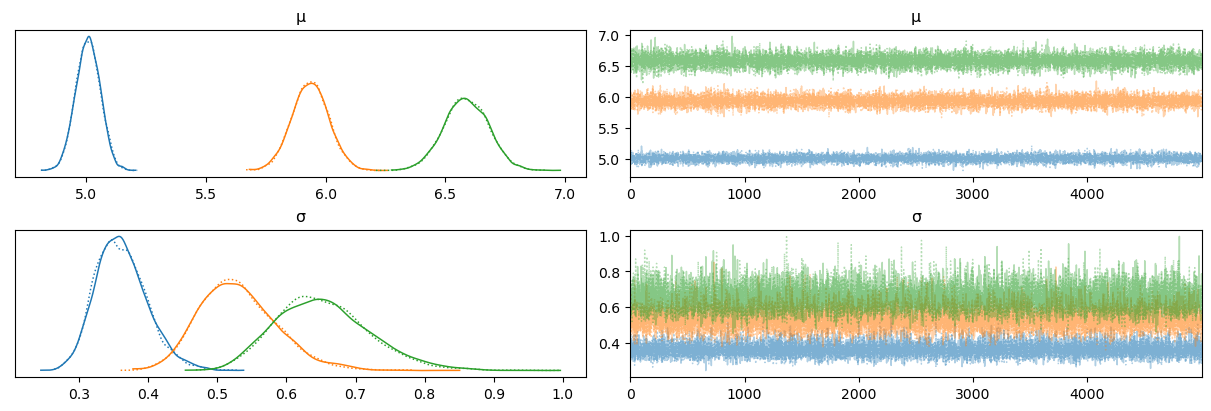

In [24]:

with pm.Model() as comparing_groups:
    μ = pm.Normal('μ', mu=0, sd=10, shape=groups)
    σ = pm.HalfNormal('σ', sd=10, shape=groups)
    y = pm.Normal('y', mu=μ[idx], sd=σ[idx], observed=tip)
    trace_cg = pm.sample(5000)
az.plot_trace(trace_cg)

  # write code for model





  

In [25]:
# summarize the inference variable for groups
az.summary(trace_cg)

D:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
μ[0],5.006,0.051,4.909,5.099,0.000,0.000,12552.0,7751.0,1.0
μ[1],5.935,0.076,5.792,6.079,0.001,0.000,14442.0,8105.0,1.0
μ[2],6.587,0.093,6.419,6.764,0.001,0.001,13465.0,8636.0,1.0
σ[0],0.361,0.037,0.297,0.434,0.000,0.000,15920.0,8043.0,1.0
σ[1],0.530,0.057,0.426,0.633,0.000,0.000,14046.0,7822.0,1.0
σ[2],0.653,0.068,0.531,0.780,0.001,0.000,16899.0,6971.0,1.0


# Your results interpretation here 

In [ ]:
# interpret group comparison here 

The first three rows of the table correspond to the parameters μ[0], μ[1], and μ[2], which have posterior means of 5.006, 5.936, and 6.587, respectively. These parameters likely represent some kind of location parameter in the model. The HDIs for these parameters are relatively narrow, suggesting that there is relatively little uncertainty in the estimates.

The next three rows correspond to the parameters σ[0], σ[1], and σ[2], which have posterior means of 0.362, 0.529, and 0.653, respectively. These parameters likely represent some kind of scale parameter in the model. The HDIs for these parameters are wider than for the location parameters, indicating that there is more uncertainty in these estimates.

The values of ess_bulk and ess_tail for all parameters are quite high, indicating that the MCMC algorithm used to estimate the posterior distributions has good mixing and that the posterior distributions are well-behaved. The values of r_hat are all 1.0, which further suggests that the MCMC algorithm has converged.